# Objectives.
***
Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.



In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import wrangle

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

# Rules
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01,None,Orange
1,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1.0,1967.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,None,Ventura
2,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1.0,1962.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01,None,Orange
3,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1.0,1970.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01,Central,Los Angeles
4,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,3101.0,96451.0,0.0,1.0,1964.0,73681.0,119407.0,45726.0,1533.89,0.006940,2017-01-01,Central,Los Angeles


In [4]:
train, validate, test = wrangle.train_validate_test_split(df)

In [5]:
train.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
24350,1.5,2.0,6.0,1048.0,6111.0,34189900.0,-118882000.0,2613.0,6.111007e+07,34278.0,2061.0,96383.0,5.0,1.0,1979.0,112755.0,187920.0,75165.0,1966.50,-0.030726,2017-04-07,None,Ventura
42778,1.0,2.0,6.0,1200.0,6037.0,33952148.0,-118314946.0,4993.0,6.037238e+07,12447.0,3101.0,96028.0,0.0,1.0,1941.0,24416.0,43027.0,18611.0,700.60,-0.130763,2017-06-02,Floor/Wall,Los Angeles
22929,3.0,5.0,6.0,2724.0,6059.0,33817508.0,-118020307.0,4010.0,6.059110e+07,44833.0,1286.0,96185.0,0.0,1.0,2004.0,311439.0,760000.0,448561.0,8967.30,0.018286,2017-04-03,None,Orange
5909,4.0,7.0,6.0,3013.0,6059.0,33726046.0,-117864974.0,5990.0,6.059074e+07,47568.0,1286.0,97007.0,6.0,1.0,1924.0,184169.0,355738.0,171569.0,4316.10,0.078875,2017-01-27,None,Orange
62940,3.0,4.0,6.0,1713.0,6059.0,33727896.0,-117907475.0,7313.0,6.059075e+07,47568.0,1286.0,97004.0,0.0,1.0,2007.0,281064.0,440434.0,159370.0,5257.98,0.006582,2017-08-01,None,Orange


In [7]:
df.buildingqualitytypeid.value_counts()

6.0     32850
8.0     11335
4.0      7368
7.0      3603
5.0      1356
9.0      1065
11.0      260
3.0       131
10.0       38
12.0       15
1.0         4
2.0         3
Name: buildingqualitytypeid, dtype: int64

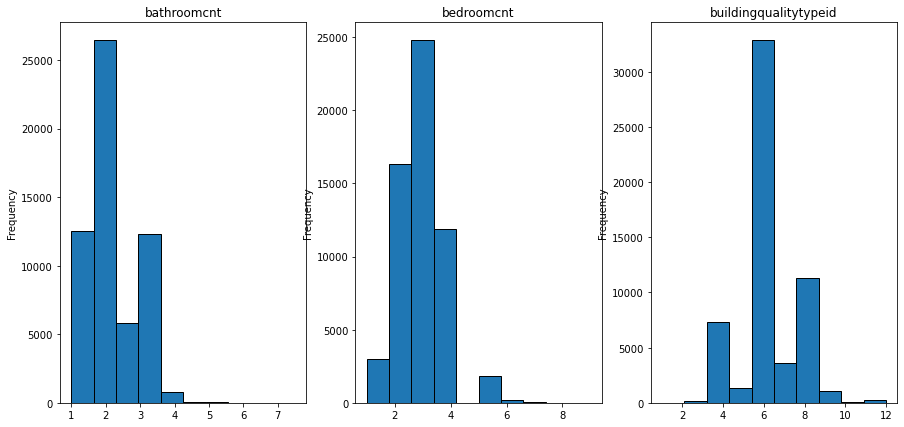

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

for ax, col in zip(axs, df.select_dtypes('number')):
    df[col].plot.hist(ax=ax, title=col, ec='black')